# Veri Ön İşleme
* Veri ön işleme; veri madenciliği modelleri kurulmadan önce veri seti üzerinde yapılan bir takım düzeltme, eksik veriyi tamamlama, tekrarlanan verileri kaldırma, dönüştürme, bütünleştirme, temizleme, normalleştirme, boyut indirgeme vb. işlemlerdir.
* Üç ana başlıkta inceleyebiliriz.

## Veri Temizleme(Data Cleaning)
* Gürültülü Veri(Noisy Data)
* Eksik Veri Analizi(Missing Data Analysis)
* Aykırı Gözlem Analizi(Outlier Analysis)
## Veri Standardizasyonu(Data Standardization)
* 0-1 Dönüşümü (Normalization)
* z-skoruna Dönüştürme(Standardization)
* Logaritmik Dönüşüm(Log Transformation)
## Veri İndirgeme(Data Reduction)
* Gözlem (Observation) Sayısının Azaltılması
* Değişken (Variable) Sayısının Azaltılması

* Bu derste veri temizleme ana başlğı altında yer alan aykırı gözlem analizini ele alacağız.

### Aykırı Gözlem Analizi(Outlier Analysis)
* Aykırı Gözlem : Bir veri setindeki gözlemlerin geri kalanından büyük ölçüde farklı olan gözlemlerdir.
* Diğer bir tanımla genel eğilimin oldukça dışına çıkan gözlemdir.
* Aykırılığı ifade eden nümerik değer aykırı değer,
* Aykırı değeri barından gözlem birimi ise aykırı gözlem olarak tanımlandırılır.

Dosya tüm değişkenleri içerir. Spesifik olarak, medyan ev değeri, orta gelir, konut medyan yaşı, toplam odalar, toplam yatak odaları, nüfus, haneler, enlem ve bu sırayla enlem içerir.

* Veri setimiz; evin değeri(medyan), gelir(medyan), konut yaşı(medyan), toplam oda sayısı, toplam yatak odası sayısı, nüfus, haneler, enlem ve boylam bilgilerini içerir.
* Veri seti hakkında daha detaylı bilgi ve indirmek için:
* https://www.kaggle.com/harrywang/housing

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* Aykırı değer gözlemlemek için veri setimizden `population` sütununu seçelim.

In [4]:
df_table=df["table"]

* Aykırı gözlemleri görselleştirmek için bir çok teknik var biz burada en yaygın olan kutu grafiği ( Box Plot ) kullanacağız.

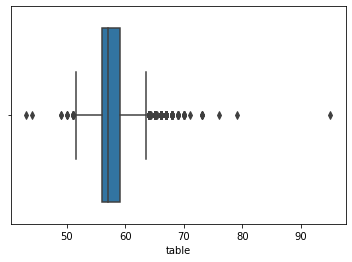

In [6]:
sns.boxplot(x=df_table);

* Grafikten anlaşılacağı üzere üst sınırın dışında aykırı gözlemlerimiz bulunuyor.

## Aykırı Gözlemleri Belirleme(Interquartile Range, IQR Yöntemi)

* Aykırı gözlemleri belirleyebilmemiz için box plotta gördüğünüz gibi sınır değerlerini tanımlamamız gerekiyor. Bunun için IQR tekniğini kullanıyoruz.

* Q1, değişkenin ilk çeyrelik kısmı ( 0.25 )

* Q3, değişkenin üçüncü çeyrekliği oluyor ( 0. 75 )

* Q3-Q1 ile IQR değerini hesaplıyoruz.

* Q1-Q3-IQR tamam şimdi sırada alt sınır ve üst sınır değerlerinde.

* Alt sınır : Q1–1.5*IQR
* Üst sınır : Q3 + 1.5*IQR
* Alt sınırın altındaki ve üst sınırın üstündeki değerler aykırı değer olarak tanımlanacak.

In [15]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [16]:
IQR

3.0

In [17]:
alt_sinir=Q3-1.5*IQR
alt_sinir

54.5

In [18]:
ust_sinir = Q3 + 1.5*IQR
ust_sinir

63.5

* Aykırı değerlerimiz üst sınırdan büyük olan değerlerdir.
* Aşağıdaki kod çıktısı `boolean(True/False)` veri türüdür.

In [11]:
df_table<alt_sinir

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [12]:
df_table > ust_sinir

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [13]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [19]:
aykiri=(df_table < alt_sinir)

In [15]:
df_table[aykiri]#aykırı değerlere erişmek için

13       54.0
16       54.0
17       54.0
37       54.0
51       54.0
         ... 
53792    54.0
53833    54.0
53878    54.0
53881    53.0
53896    54.0
Name: table, Length: 3475, dtype: float64

In [16]:
df_table[aykiri].index#aykrı değerlerin indekslerine erişmek için

Int64Index([   13,    16,    17,    37,    51,    77,   101,   115,   117,
              121,
            ...
            53737, 53742, 53771, 53772, 53790, 53792, 53833, 53878, 53881,
            53896],
           dtype='int64', length=3475)

In [17]:
aykiri_df=pd.DataFrame(data=df_table[aykiri])#dataframe'ye çevirme
aykiri_df.head()

,table
13,54.0
16,54.0
17,54.0
37,54.0
51,54.0


## Aykırı Gözlemleri Silme

* Silme işlemini gerçekleştirmeden önce `df_population` değişkeninin tipini ve boyutunu öğrenelim.
* Eğer veri türü `DataFrame` değil ise veri türünü `DataFrame`'ye çevirelim.

In [18]:
type(df_table)

pandas.core.series.Series

In [19]:
df_table=pd.DataFrame(data=df_table)

In [20]:
df_table.shape

(53940, 1)

* Üst sınırdan büyük olan değerleden yani aykırı değerlerden kurtulmak için yeni bir değişken tanımlayalım.
* Aşağıdaki kodda ~ sembolünün işlevi sağ taraftaki işlemin dışındakileri seçmektir.
* .any(axis = 1) ile de sütun bazında işlem yapmak istediğimizi belirtmiş olduk.

In [21]:
new_df_table =df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]
new_df_table.shape

(49876, 1)

## Ortalama İle Doldurma
* Aykırı değerlerin yerine ortalama değerlerle dolduralım.
* Bunun için `.mean()` parametresini kullanacağız.

In [3]:
df.table.mean()#ortalama değeri hesaplama

57.45718390804603

In [13]:
df_table[aykiri]=df.table.mean()
df_table[aykiri]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


13       57.457184
16       57.457184
17       57.457184
37       57.457184
51       57.457184
           ...    
53792    57.457184
53833    57.457184
53878    57.457184
53881    57.457184
53896    57.457184
Name: table, Length: 3475, dtype: float64

## Baskılama Yöntemi
* Aykırı değerler için üst ve alt sınır belirlemiştik.
* Aykırı değerlerimizi baskılama yöntemi ile üst sınıra yakın olanları üst sınıra, alt sınıra yakın olan değerleri alt sınıra eşitliyoruz.
* Üst sınır değerimizi tekrar hesaplayalım.

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [6]:
ust_sinir = Q3 + 1.5*IQR
ust_sinir

63.5

In [7]:
alt_sinir=Q3-1.5*IQR
alt_sinir

54.5

In [8]:
aykiri=(df_table < alt_sinir)

In [10]:
df_table[aykiri]=alt_sinir
df_table[aykiri]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


13       54.5
16       54.5
17       54.5
37       54.5
51       54.5
         ... 
53792    54.5
53833    54.5
53878    54.5
53881    54.5
53896    54.5
Name: table, Length: 3475, dtype: float64

* En son olarak alt sınırda olan aykırı gözlemlerden kurtulduğumuzdan emin olmak için kutu grafiği(Box Plot) ile bir gözlem yapalım.

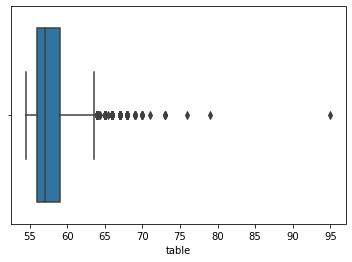

In [12]:
sns.boxplot(x=df_table)

# KAYNAKLAR
* https://www.veribilimiokulu.com/buyuk-veri-on-isleme